In [2]:
import qiskit.tools.jupyter

%qiskit_version_table

In [3]:
# Running checks for the correct dependencies
import qiskit
from packaging import version

if not (
    version.parse(qiskit.__qiskit_version__["qiskit-terra"]) >= version.parse("0.22")
):
    print(
        "Incorrect dependencies. Found qiskit-terra: "
        + qiskit.__qiskit_version__["qiskit-terra"]
        + "\nNeed qiskit-terra >= 0.22"
    )

try:
    import qiskit_ibm_provider
except ModuleNotFoundError:
    print(
        "You must install the qiskit_ibm_provider with 'pip install qiskit_ibm_provider'"
    )
    raise

In [4]:
# Ignoring warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [5]:
# Note: This can be any hub/group/project that has access to the required device and the Qiskit runtime.
hub = "ibm-q"
group = "open"
project = "main"
backend_name = "ibm_perth"
hgp = f"{hub}/{group}/{project}"

In [6]:
import qiskit
from qiskit_ibm_provider import IBMProvider

# Save token if necessary
IBMProvider.save_account(overwrite=True,token='43ffbc7a7699d13ce556fa8dc0120ee0b01530c3d436862a7b067c38ef812ae90314c62a544085b73364e7ed6bd3c1e0dd6d727edd99f085c136567123b8edd7')

# Get our backend
provider = IBMProvider()
available_backends = provider.backends()
backend = provider.get_backend(backend_name, instance=hgp)
print(f"Using backend {backend.name}")

Using backend ibm_perth


In [7]:
#backend names that support dynamic circuits
qasm3_backends = set(
    backend.name for backend in provider.backends(dynamic_circuits=True)
)

print(f"The following backends support dynamic circuits: {qasm3_backends}")

The following backends support dynamic circuits: {'ibm_nairobi', 'ibmq_manila', 'ibm_lagos', 'ibmq_jakarta', 'ibm_perth'}


In [8]:
qubit = 0
shots = 1000

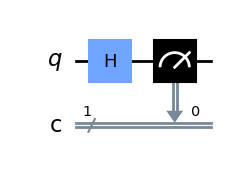

In [11]:
from qiskit import QuantumCircuit

#build a quantum circuit with one qubit
#consists of a single Hadamard gate and a measurement
qc_1 = QuantumCircuit(1, 1, name="|+> Prep")
qc_1.h(0)
qc_1.measure(0, 0)
qc_1.draw(idle_wires=False, output="mpl")

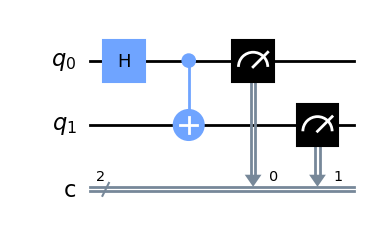

In [27]:
#build a quantum circuit consisting of two qubits
#there is a Hadamard gate and a CX gate
qc_2 = QuantumCircuit(2, 2)
qc_2.h(0)
qc_2.cx(0, 1)
qc_2.measure([0, 1], [0, 1])
qc_2.draw('mpl')

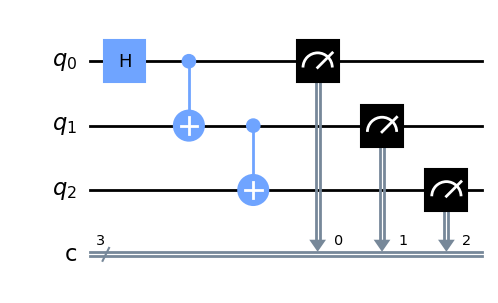

In [31]:
#build a quantum circuit consisting of three qubits
#there is a Hadamard gate and a CX gate
qc_3 = QuantumCircuit(3, 3)
qc_3.h(0)
qc_3.cx(0, 1)
qc_3.cx(1, 2)
qc_3.measure([0, 1, 2], [0, 1, 2])
qc_3.draw('mpl')

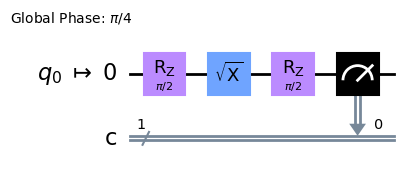

In [25]:
from qiskit import transpile

#compile circuit h_qc with single qubit
qc_1_transpiled = transpile(qc_1, backend, initial_layout=[0])
qc_1_transpiled.draw(idle_wires=False, output="mpl")

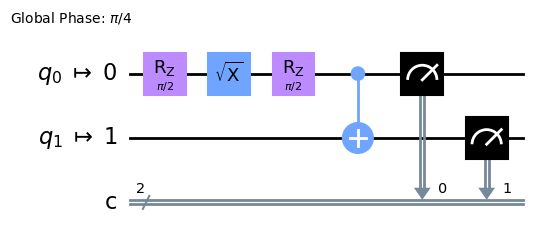

In [24]:
#compile circuit with two qubits
qc_2_transpiled = transpile(qc_2, backend, initial_layout=[0,1])
qc_2_transpiled.draw(idle_wires=False, output="mpl")

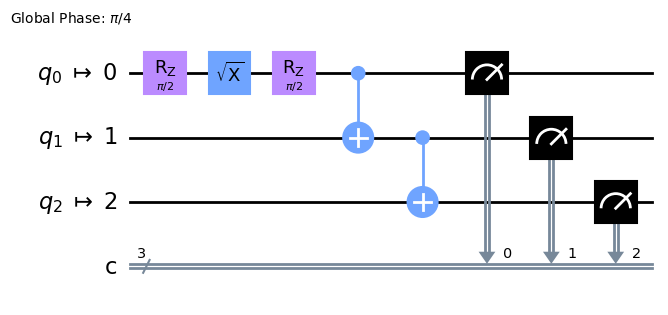

In [32]:
#compile circuit with two qubits
qc_3_transpiled = transpile(qc_3, backend, initial_layout=[0,1,2])
qc_3_transpiled.draw(idle_wires=False, output="mpl")

In [33]:
job = backend.run(qc_3_transpiled, shots=shots, dynamic=True)
print(f"Your job's id: {job.job_id()}")
result = job.result()
print(f"|+> preparation results: {result.get_counts(0)}")

Your job's id: cjqgs4a7b8jcak4hgn9g
|+> preparation results: {'000': 497, '001': 9, '010': 3, '011': 11, '100': 8, '101': 5, '110': 27, '111': 440}


In [13]:
job.error_message()

In [14]:
import qiskit.tools.jupyter

%qiskit_version_table